In [1]:
import vipy
from keynet.system import Keynet

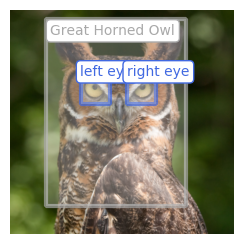

In [2]:
im_source = vipy.image.owl().centersquare().mindim(224).show()

In [3]:
# Stochastic Keynet
(sensor, model) = Keynet(inshape=(3,224,224),  net=None, blocksize=224//16,
                         global_geometric='hierarchical_permutation', hierarchical_blockshape=(2,2), hierarchical_permute_at_level=(0,1,2,3), 
                         global_photometric='blockwise_constant_bias', 
                         local_geometric='givens_orthogonal', alpha=224//16,  
                         local_photometric='uniform_random_affine', beta=10.0, gamma=1000.0,  
                         memoryorder='block')  

(1, 3, 224, 224)
[keynet.layer]: forward <KeyedSensor: height=224, width=224, channels=3>


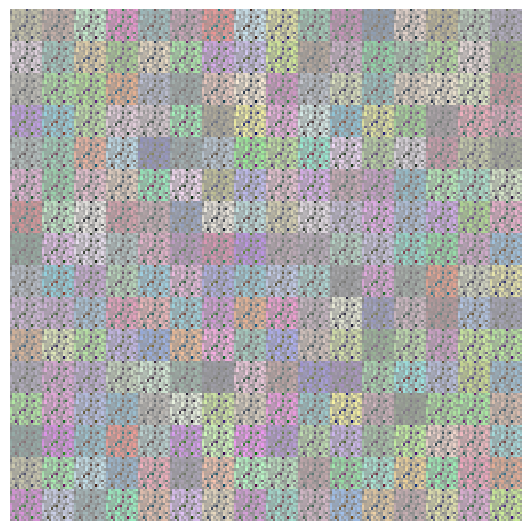

<vipy.image: height=512, width=512, color=rgb>

In [4]:
# Show the keyed image
print(sensor._inshape)
keyed = sensor.fromimage(im_source).encrypt()
keyed.toimage().maxsquare().mindim(512, interp='nearest').show()    

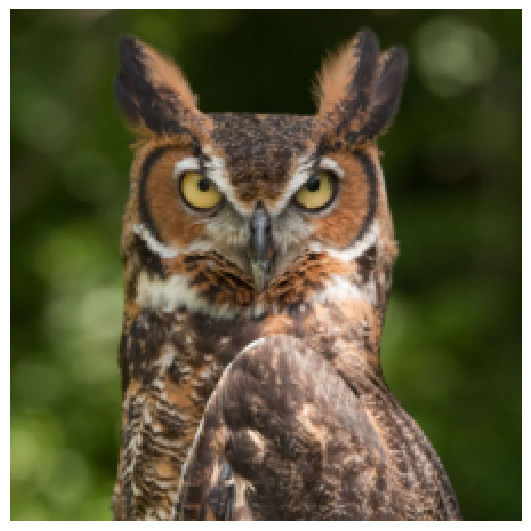

<vipy.image: height=512, width=512, color=rgb>

In [5]:
# Recover the original image
keyed.decrypt().toimage().mindim(512, interp='nearest').show()    